📊 Performance Comparison:
    Alpha     Ridge_MSE  Ridge_R2     Lasso_MSE  Lasso_R2
0   0.01  4.983142e+07  0.902444  4.983010e+07  0.902446
1   0.10  4.984348e+07  0.902420  4.983013e+07  0.902446
2   1.00  4.997485e+07  0.902163  4.983043e+07  0.902446
3   5.00  5.078549e+07  0.900576  4.983179e+07  0.902443
4  10.00  5.226919e+07  0.897671  4.983348e+07  0.902440
5  50.00  7.586243e+07  0.851482  4.984719e+07  0.902413


C:\Users\aya mostafa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\aya mostafa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


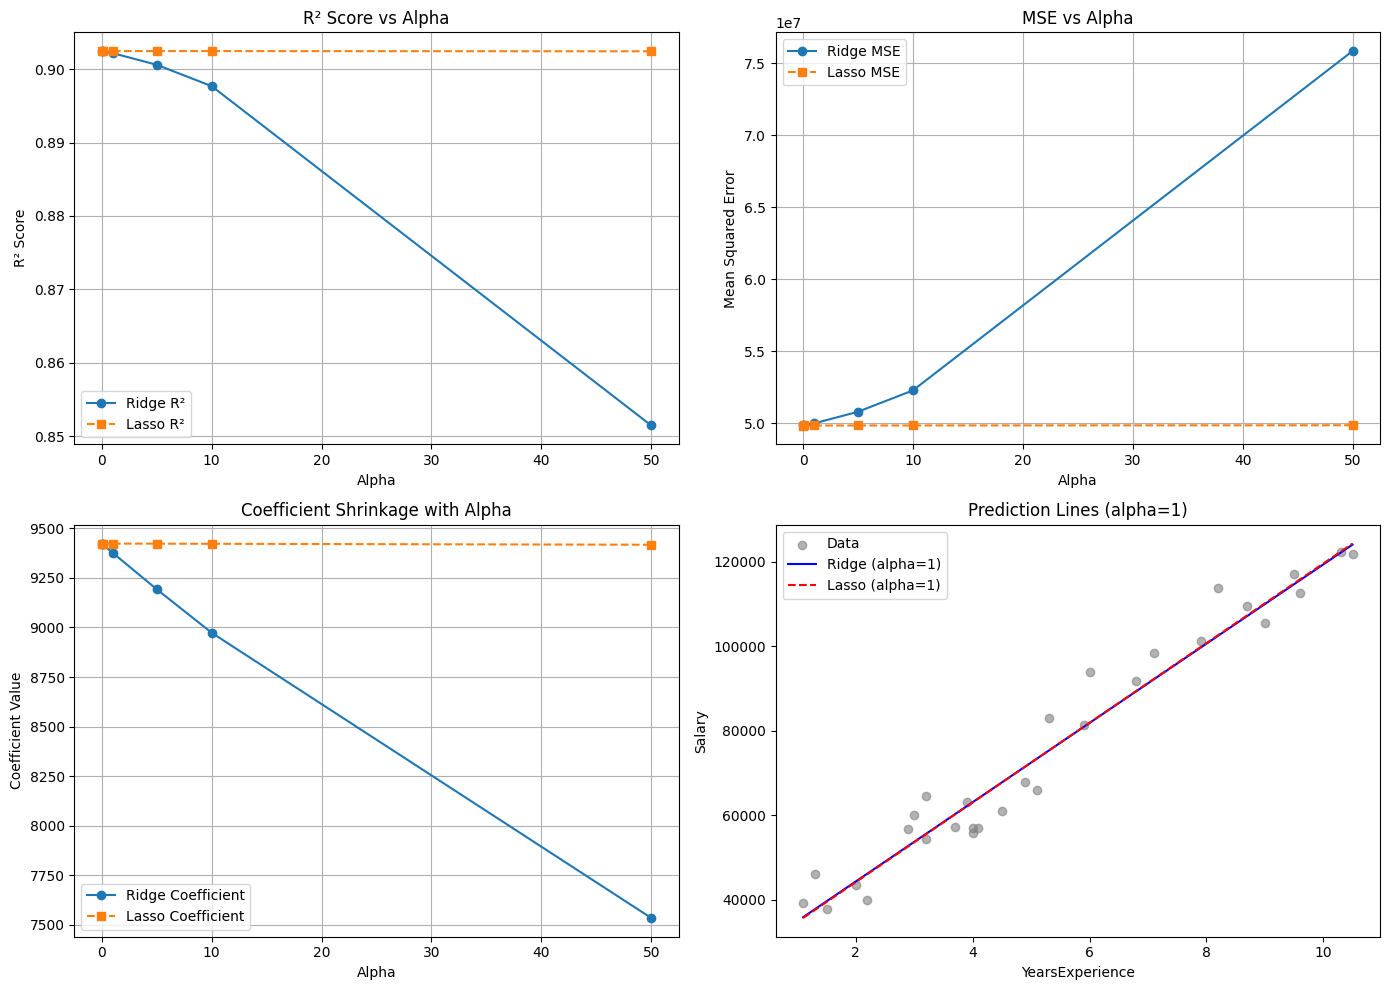


🔎 Insights:
- Ridge shrinks coefficients but never makes them exactly zero.
- Lasso can shrink some coefficients to exactly zero, performing feature selection.
- On this simple dataset (1 feature), both models behave similarly.
- In high-dimensional datasets, Ridge is better for reducing overfitting, while Lasso helps in feature selection.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv(r"C:\Users\aya mostafa\Downloads\Salary_Data.csv")

X = df[["YearsExperience"]]
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.01, 0.1, 1, 5, 10, 50]
results = []
coef_ridge = []
coef_lasso = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_preds = ridge.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_preds)
    ridge_r2 = r2_score(y_test, ridge_preds)
    coef_ridge.append(ridge.coef_[0])
    
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_preds = lasso.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_preds)
    lasso_r2 = r2_score(y_test, lasso_preds)
    coef_lasso.append(lasso.coef_[0])
    
    results.append([alpha, ridge_mse, ridge_r2, lasso_mse, lasso_r2])

results_df = pd.DataFrame(results, columns=["Alpha", "Ridge_MSE", "Ridge_R2", "Lasso_MSE", "Lasso_R2"])
print("📊 Performance Comparison:\n", results_df)

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.plot(results_df["Alpha"], results_df["Ridge_R2"], marker='o', label="Ridge R²")
plt.plot(results_df["Alpha"], results_df["Lasso_R2"], marker='s', label="Lasso R²", linestyle="--")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("R² Score vs Alpha")
plt.legend()
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(results_df["Alpha"], results_df["Ridge_MSE"], marker='o', label="Ridge MSE")
plt.plot(results_df["Alpha"], results_df["Lasso_MSE"], marker='s', label="Lasso MSE", linestyle="--")
plt.xlabel("Alpha")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Alpha")
plt.legend()
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(alphas, coef_ridge, marker='o', label="Ridge Coefficient")
plt.plot(alphas, coef_lasso, marker='s', label="Lasso Coefficient", linestyle="--")
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Shrinkage with Alpha")
plt.legend()
plt.grid(True)

plt.subplot(2,2,4)
plt.scatter(X, y, color="gray", alpha=0.6, label="Data")
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
ridge_best = Ridge(alpha=1).fit(X_train, y_train)
lasso_best = Lasso(alpha=1, max_iter=10000).fit(X_train, y_train)
plt.plot(x_range, ridge_best.predict(x_range), color="blue", label="Ridge (alpha=1)")
plt.plot(x_range, lasso_best.predict(x_range), color="red", linestyle="--", label="Lasso (alpha=1)")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Prediction Lines (alpha=1)")
plt.legend()

plt.tight_layout()
plt.show()

print("\n🔎 Insights:")
print("- Ridge shrinks coefficients but never makes them exactly zero.")
print("- Lasso can shrink some coefficients to exactly zero, performing feature selection.")
print("- On this simple dataset (1 feature), both models behave similarly.")
print("- In high-dimensional datasets, Ridge is better for reducing overfitting, while Lasso helps in feature selection.")